Aggregated features and clusters:
| Nama                            | Harga_avg   | Layanan_avg   | Taste_avg   | Varian_avg   | Porsi_avg   | kmeans_cluster   | fcm_cluster   | fcm_max_membership   |
|:--------------------------------|:------------|:--------------|:------------|:-------------|:------------|:-----------------|:--------------|:---------------------|
| Muhammad Ikhwan                 | 6.33333     | 7.55556       | 7.66667     | 7.22222      | 7.44444     | 1                | 0             | 0.836558             |
| Arfi Adi Nugroho                | 7.33333     | 7.33333       | 7.66667     | 6.66667      | 8           | 1                | 0             | 0.920883             |
| Much Hafidz Indrajid            | 7           | 7.375         | 7.375       | 6.75         | 7.375       | 1                | 0             | 0.849738             |
| Azzuhra                         | 8.16667     | 8.83333       | 8.66667     | 8.33333      | 8.5         | 1                | 0  

,Nama,Harga_avg,Layanan_avg,Taste_avg,Varian_avg,Porsi_avg,kmeans_cluster
0,Muhammad Ikhwan,6.333333,7.555556,7.666667,7.222222,7.444444,1
1,Arfi Adi Nugroho,7.333333,7.333333,7.666667,6.666667,8.000000,1
2,Much Hafidz Indrajid,7.000000,7.375000,7.375000,6.750000,7.375000,1
3,Azzuhra,8.166667,8.833333,8.666667,8.333333,8.500000,1
4,Faiz,7.857143,7.714286,7.428571,6.000000,7.142857,1
5,Yuhanidz Habibah,5.100000,7.000000,5.900000,6.500000,6.300000,0
6,Linda Anggara,7.800000,8.000000,7.600000,8.000000,7.600000,1
7,Amelia Rahmadini,7.750000,8.500000,8.250000,8.000000,7.875000,1
8,Christine,8.000000,8.000000,6.800000,6.777778,8.100000,1
9,Dave,5.666667,5.166667,6.166667,5.833333,6.333333,0


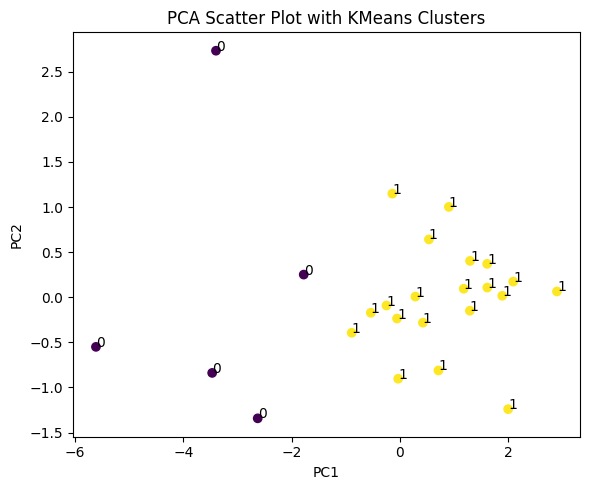

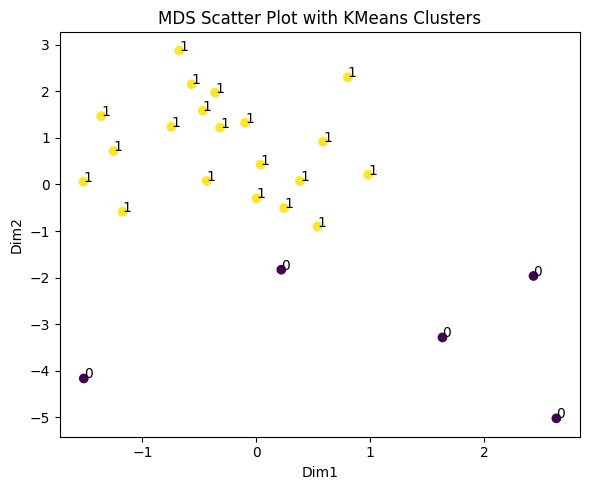

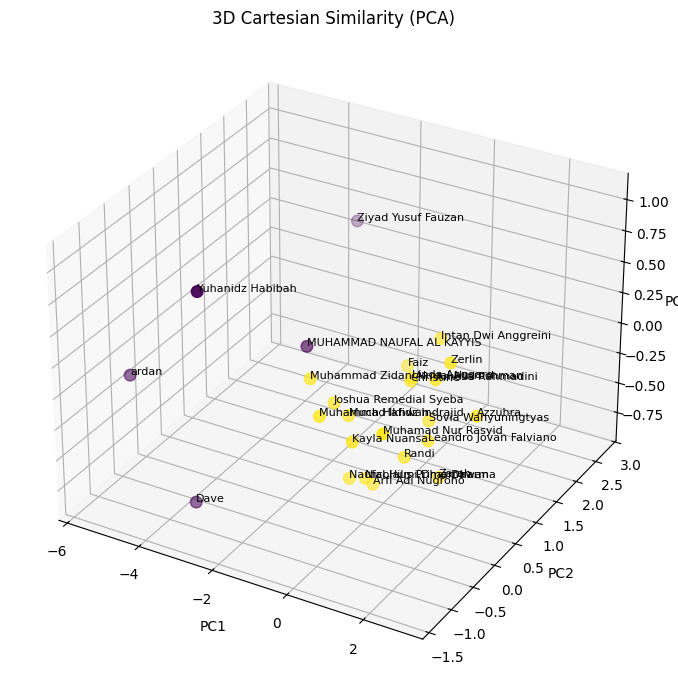

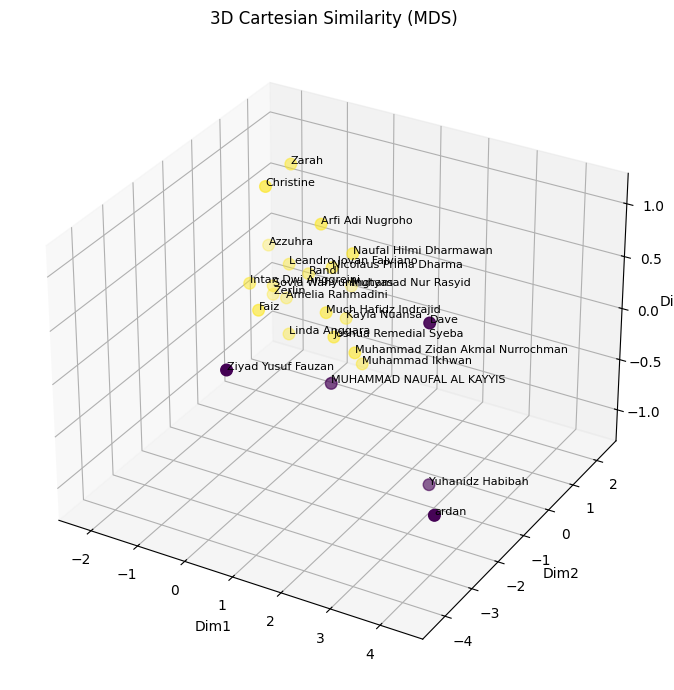

In [8]:
from io import StringIO
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- CSV text (copied from user's message) ---
csv_text = r'''Timestamp,"Nama ","  Harga  ","Layanan","Taste","Varian","Porsi","  Harga  ","Layanan","Taste","Varian","Porsi","  Harga  ","Layanan","Taste","Varian","Porsi","  Harga  ","Layanan","Taste","Varian","Porsi","  Harga  ","Layanan","Taste","Varian","Porsi","  Harga  ","Layanan","Taste","Varian","Porsi","  Harga  ","Layanan","Taste","Varian","Porsi","  Harga  ","Layanan","Taste","Varian","Porsi","  Harga  ","Layanan","Taste","Varian","Porsi","  Harga  ","Layanan","Taste","Varian","Porsi"
2025/10/17 5:53:01 PM GMT+7,"Muhammad Ikhwan ","6","8","7","9","7","4","6","9","9","6","8","8","6","7","8","8","9","9","7","9","2","7","6","7","6","7","7","8","7","9","8","9","9","6","9","7","7","6","4","6","7","7","9","9","7","","","","",""
2025/10/17 8:26:36 PM GMT+7,"Arfi Adi Nugroho","7","8","8","6","8","7","7","8","7","8","","","","","","","","","","","","","","","","8","7","7","7","8","","","","","","","","","","","","","","","","","","","",""
2025/10/17 8:28:56 PM GMT+7,"Much Hafidz Indrajid","7","8","8","6","7","6","7","8","8","8","7","7","7","6","7","7","7","7","7","8","","","","","","8","8","8","8","8","7","8","5","5","7","7","7","8","6","6","7","7","8","8","8","","","","",""
2025/10/18 10:20:01 AM GMT+7,"Azzuhra ","8","9","9","9","9","9","9","9","9","9","8","8","7","7","8","9","9","9","9","9","6","9","9","7","7","","","","","","9","9","9","9","9","","","","","","","","","","","","","","",""
2025/10/18 10:21:48 AM GMT+7,"Faiz","8","8","8","5","7","7","7","7","8","7","","","","","","","","","","","6","7","6","6","4","8","8","8","7","9","9","9","9","6","8","9","8","7","4","7","8","7","7","6","8","","","","",""
2025/10/18 5:13:11 PM GMT+7,"Yuhanidz Habibah","2","5","5","3","3","5","9","7","9","7","5","3","8","5","5","8","8","6","7","8","2","5","3","6","2","7","8","8","8","8","8","8","5","5","8","8","8","5","7","8","3","8","7","8","8","3","8","5","7","6"
2025/10/19 4:00:12 PM GMT+7,"Linda Anggara","8","8","7","8","8","7","8","8","8","8","","","","","","8","8","8","8","8","","","","","","","","","","","","","","","","8","8","7","8","7","","","","","","8","8","8","8","7"
2025/10/20 9:10:18 AM GMT+7,"Amelia Rahmadini","9","9","8","5","6","6","9","9","9","9","9","9","9","9","5","6","8","5","9","9","","","","","","9","6","8","8","9","9","9","9","9","9","","","","","","8","9","9","9","9","6","9","9","6","7"
2025/10/20 9:10:41 AM GMT+7,"Christine","8","8","6","5","8","8","8","7","","9","8","8","8","8","8","8","8","7","7","8","8","8","7","7","8","8","8","6","6","8","8","8","7","7","8","8","8","6","6","7","8","8","7","8","9","8","8","7","7","8"
2025/10/20 9:11:36 AM GMT+7,"Dave","5","5","6","6","7","4","4","6","5","6","4","4","5","4","5","7","6","6","5","6","","","","","","7","6","7","8","7","","","","","","","","","","","7","6","7","7","7","","","","",""
2025/10/20 9:12:44 AM GMT+7,"Zerlin","7","9","9","9","9","9","9","9","9","9","7","8","9","7","5","8","9","7","7","7","6","9","7","6","5","9","9","9","9","9","8","9","9","9","9","8","8","8","8","8","9","9","8","8","9","8","8","8","8","9"
2025/10/20 9:13:05 PM GMT+7,"MUHAMMAD NAUFAL AL KAYYIS","7","7","8","5","6","7","8","8","8","7","7","7","7","6","7","7","7","7","6","6","6","7","6","6","6","6","6","6","6","6","7","7","7","6","7","7","7","6","6","6","7","7","6","6","6","6","6","6","6","6"
2025/10/20 3:22:01 PM GMT+7,"Randi","8","8","8","7","9","9","9","9","9","9","7","8","8","8","8","7","7","7","7","7","7","7","7","8","6","8","9","8","9","8","7","8","9","7","8","8","7","9","7","9","8","7","7","8","8","8","7","7","9","8"
2025/10/21 7:54:50 AM GMT+7,"Joshua Remedial Syeba ","8","8","8","6","7","7","6","8","7","7","8","9","7","8","8","9","9","9","9","9","4","7","5","6","6","5","6","7","7","7","7","6","7","4","8","7","7","6","7","7","7","6","8","7","6","7","8","7","8","6"
2025/10/21 7:57:20 AM GMT+7,"Ziyad Yusuf Fauzan","9","7","8","2","4","7","6","4","7","5","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","",""
2025/10/21 8:02:52 AM GMT+7,"Intan Dwi Anggreini","9","9","7","7","7","8","8","8","7","7","9","8","9","8","7","8","8","8","7","7","8","8","8","7","7","8","8","8","7","7","8","8","8","7","7","8","8","7","7","7","8","8","7","8","8","8","8","8","7","7"
2025/10/21 8:24:02 AM GMT+7,"Muhamad Nur Rasyid ","2","9","9","9","5","","","","","","","","","","","7","8","7","9","9","","","","","","","","","","","7","9","9","9","8","9","9","9","9","9","9","8","8","8","9","7","7","9","8","9"
2025/10/21 8:58:14 AM GMT+7,"Leandro Jovan Falviano","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","8","7","8","8","8","8","8","8","8","8"
2025/10/21 8:58:53 AM GMT+7,"Zarah","7","7","8","6","8","9","9","9","7","9","4","7","9","5","6","8","8","8","8","8","","","","","","9","9","9","9","9","","","","","","","","","","","9","7","9","7","8","9","9","9","7","9"
2025/10/21 8:59:01 AM GMT+7,"ardan","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","5","4","5","4","5","5","5","5","5","5","","","","","","","","","","","","","","","","","","","",""
2025/10/21 8:59:12 AM GMT+7,"Muhammad Zidan Akmal Nurrochman","8","7","6","8","8","6","8","7","8","7","7","7","8","6","6","7","6","5","7","8","5","6","7","3","7","6","8","6","8","6","7","8","6","8","6","6","8","7","7","8","8","9","9","6","9","5","7","7","4","8"
2025/10/21 9:02:32 AM GMT+7,"Nicolaus Prima Dharma ","6","4","8","7","8","7","7","8","8","9","7","8","7","7","7","8","9","9","7","8","8","7","8","7","8","8","8","8","7","8","7","7","8","7","8","7","7","7","7","8","7","8","7","8","7","7","8","8","7","7"
2025/10/21 9:04:54 AM GMT+7,"Kayla Nuansa ","4","5","9","9","9","5","8","9","9","9","9","9","9","9","9","9","9","9","9","9","5","5","5","5","5","8","8","6","6","7","9","9","9","9","9","9","9","9","9","9","7","9","8","7","7","4","5","4","7","5"
2025/10/21 9:11:53 AM GMT+7,"Sovia Wahyuningtyas","8","8","8","7","7","7","8","7","8","7","8","7","8","7","8","8","8","9","8","8","8","8","9","7","7","8","8","9","7","8","8","8","7","9","7","8","7","9","7","8","9","8","8","9","7","8","8","8","8","8"
2025/10/21 12:13:32 PM GMT+7,"Naufal Hilmi Dharmawan","8","6","9","8","8","8","7","8","9","9","8","7","7","8","8","7","7","7","7","7","6","7","7","6","6","7","","7","7","7","7","7","7","7","7","","","","","","","","","","","","","","",""
'''

# --- Read into DataFrame ---
df = pd.read_csv(StringIO(csv_text))

# Quick clean: strip whitespace in column names and name
df.columns = [c.strip() for c in df.columns]
if 'Nama' not in df.columns and 'Nama ' in df.columns:
    # handle likely header 'Nama ' variation
    df = df.rename(columns={c: c.strip() for c in df.columns})
df['Nama'] = df['Nama'].astype(str).str.strip()

# Identify feature columns (after Timestamp and Nama)
meta_cols = ['Timestamp', 'Nama']
feat_cols = [c for c in df.columns if c not in meta_cols]

# Ensure empty strings are treated as NaN and convert to numeric where possible
df[feat_cols] = df[feat_cols].replace(r'^\s*$', np.nan, regex=True)
df[feat_cols] = df[feat_cols].apply(pd.to_numeric, errors='coerce')

# Determine number of blocks of 5 (Harga,Layanan,Taste,Varian,Porsi)
n_feats = len(feat_cols)
if n_feats % 5 != 0:
    # It's possible trailing empty columns; attempt to proceed with floor division
    n_blocks = n_feats // 5
else:
    n_blocks = n_feats // 5

blocks = []
for i in range(n_blocks):
    block = feat_cols[i*5:(i+1)*5]
    blocks.append(block)

# Build aggregated DataFrame: averages across outlets per category
agg = pd.DataFrame()
agg['Nama'] = df['Nama']

# For each attribute position in block: 0=Harga,1=Layanan,2=Taste,3=Varian,4=Porsi
attr_names = ['Harga_avg','Layanan_avg','Taste_avg','Varian_avg','Porsi_avg']
for j, attr in enumerate(attr_names):
    cols_j = [b[j] for b in blocks if len(b) > j]
    if len(cols_j) == 0:
        agg[attr] = np.nan
    else:
        agg[attr] = df[cols_j].mean(axis=1, skipna=True)

# Drop rows with all NaNs in aggregates (if any)
agg_features = agg[attr_names].copy()
valid_mask = ~agg_features.isnull().all(axis=1)
agg = agg[valid_mask].reset_index(drop=True)
agg_features = agg[attr_names].reset_index(drop=True)

# Standardize features (z-score) for PCA/MDS/Clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(agg_features.fillna(agg_features.mean()))

# PCA
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

# MDS (metric)
mds = MDS(n_components=2, random_state=0, dissimilarity='euclidean')
X_mds = mds.fit_transform(X)

# Elbow (inertia) and Silhouette for KMeans k=2..6
inertias = []
sil_scores = []
K_range = range(2,7)
for k in K_range:
    km = KMeans(n_clusters=k, init='k-means++', random_state=0, n_init=10)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    try:
        sil = silhouette_score(X, labels)
    except:
        sil = np.nan
    sil_scores.append(sil)

# Choose k as the one with highest silhouette among 2..6
best_k = K_range[int(np.nanargmax(sil_scores))]
km_final = KMeans(n_clusters=best_k, init='k-means++', random_state=0, n_init=20)
labels_km = km_final.fit_predict(X)
agg['kmeans_cluster'] = labels_km

# Simple Fuzzy C-Means implementation
def fuzzy_c_means(X, c=3, m=2.0, max_iter=150, tol=1e-5):
    # X: numpy array (n_samples, n_features)
    n = X.shape[0]
    # initialize membership randomly
    U = np.random.dirichlet(np.ones(c), size=n)  # shape (n,c)
    for iteration in range(max_iter):
        U_old = U.copy()
        # compute cluster centers
        um = U ** m  # (n,c)
        centers = (um.T @ X) / np.sum(um.T, axis=1)[:,None]  # (c, features)
        # update distance matrix (n x c)
        dist = np.zeros((n, c))
        for i in range(c):
            dist[:, i] = np.linalg.norm(X - centers[i], axis=1) + 1e-8
        # update U
        inv = dist ** (-2/(m-1))
        U = inv / np.sum(inv, axis=1, keepdims=True)
        # check convergence
        if np.linalg.norm(U - U_old) < tol:
            break
    return centers, U

# Run FCM with same k as best_k
centers_fcm, U_fcm = fuzzy_c_means(X, c=best_k, m=2.0)
# crisp assignment by highest membership
labels_fcm_crisp = np.argmax(U_fcm, axis=1)
agg['fcm_cluster'] = labels_fcm_crisp
# Also add max membership as a confidence
agg['fcm_max_membership'] = U_fcm.max(axis=1)

# --- Display results ---
# 1) Show aggregated feature table (first rows)
print("Aggregated features and clusters:")
print(agg[['Nama'] + attr_names + ['kmeans_cluster','fcm_cluster','fcm_max_membership']].to_markdown(index=False, numalign="left", stralign="left"))

# 2) Print chosen k and silhouette scores
print("K range tested:", list(K_range))
print("Inertias:", inertias)
print("Silhouette scores:", sil_scores)
print("Chosen best k (by silhouette):", best_k)

# Display summary table
display(agg[['Nama'] + attr_names + ['kmeans_cluster']])

# PCA SCATTER
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_km)
for i, name in enumerate(agg['Nama']):
    plt.text(X_pca[i,0], X_pca[i,1], str(labels_km[i]))
plt.title("PCA Scatter Plot with KMeans Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

# MDS SCATTER
plt.figure(figsize=(6,5))
plt.scatter(X_mds[:,0], X_mds[:,1], c=labels_km)
for i, name in enumerate(agg['Nama']):
    plt.text(X_mds[i,0], X_mds[i,1], str(labels_km[i]))
plt.title("MDS Scatter Plot with KMeans Clusters")
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.tight_layout()
plt.show()

# ============================================================
# 3D Cartesian Projection of Outlet Similarities
# ============================================================

from mpl_toolkits.mplot3d import Axes3D


# ---------------------------
#  PCA 3D OUTLET SIMILARITY
# ---------------------------
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=labels_km, s=70)

for i, name in enumerate(agg['Nama']):
    ax.text(X_pca3[i,0], X_pca3[i,1], X_pca3[i,2], name, size=8)

ax.set_title("3D Cartesian Similarity (PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()

# ---------------------------
#  MDS 3D OUTLET SIMILARITY
# ---------------------------
mds3 = MDS(n_components=3, random_state=0, dissimilarity='euclidean')
X_mds3 = mds3.fit_transform(X)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_mds3[:,0], X_mds3[:,1], X_mds3[:,2], c=labels_km, s=70)

for i, name in enumerate(agg['Nama']):
    ax.text(X_mds3[i,0], X_mds3[i,1], X_mds3[i,2], name, size=8)

ax.set_title("3D Cartesian Similarity (MDS)")
ax.set_xlabel("Dim1")
ax.set_ylabel("Dim2")
ax.set_zlabel("Dim3")
plt.tight_layout()
plt.show()
